In [3]:
# pip install psycopg2-binary pandas

# Connect to PostgreSQL

In [2]:
import psycopg2
import pandas as pd

# Connect to PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database="customer_db",
    user="postgres",
    password="Nishu@0139"
)

print("Connected successfully!")

Connected successfully!


# Remove Warnings

In [3]:
import warnings
warnings.filterwarnings("ignore", message="pandas only supports SQLAlchemy connectable")

# Inserting Tables

### 1. Customers Table

In [4]:
query = "SELECT * FROM customers;"
df_customers = pd.read_sql(query, conn)
df_customers

,customer_id,name,email,city,country,date_of_birth,created_at,date_joined
0,1,Alice Johnson,alice.johnson@example.com,New York,USA,1989-05-14,2026-01-17 14:23:34.562172,2026-01-02
1,2,Bob Smith,bob.smith@example.com,Los Angeles,USA,1970-08-22,2026-01-17 14:23:34.562172,2025-12-18
2,3,Charlie Brown,charlie.brown@example.com,London,UK,1995-12-02,2026-01-17 14:23:34.562172,2025-12-03
3,4,Diana Prince,diana.prince@example.com,Paris,France,1980-03-18,2026-01-17 14:23:34.562172,2025-11-18
4,5,Ethan Hunt,ethan.hunt@example.com,Berlin,Germany,1955-07-13,2026-01-17 14:23:34.562172,2025-11-03
5,6,Frank Miller,frank.miller@example.com,New York,USA,1990-09-10,2026-01-17 14:23:34.599637,2025-10-19
6,7,Grace Lee,grace.lee@example.com,London,UK,1988-04-25,2026-01-17 14:23:34.599637,2025-10-04
7,8,Henry Adams,henry.adams@example.com,Berlin,Germany,1992-11-03,2026-01-17 14:23:34.599637,2025-09-19
8,9,Isabella Rossi,isabella.rossi@example.com,Paris,France,1985-06-19,2026-01-17 14:23:34.599637,2025-09-04
9,10,Jack Wilson,jack.wilson@example.com,New York,USA,1998-01-14,2026-01-17 14:23:34.599637,2025-08-20


### 2. Orders Table

In [5]:
query = "SELECT * FROM orders;"
df_orders = pd.read_sql(query, conn)
df_orders

,order_id,customer_id,order_date,amount,status,created_at
0,1,1,2025-02-10,250.75,Delivered,2025-02-10
1,2,2,2025-03-05,120.50,Shipped,2025-03-05
2,3,1,2025-04-12,75.00,Pending,2025-04-12
3,4,3,2025-01-25,300.00,Delivered,2025-01-25
4,5,5,2026-01-07,220.25,Shipped,2026-01-07
5,6,6,2025-02-18,540.00,Delivered,2025-02-18
6,7,7,2025-03-10,220.00,Delivered,2025-03-10
7,8,8,2025-04-05,310.00,Shipped,2025-04-05
8,9,9,2025-03-22,460.00,Delivered,2025-03-22
9,10,10,2025-04-15,180.00,Pending,2025-04-15


### 3. Categories Table

In [6]:
query = "SELECT * FROM categories;"
df_categories = pd.read_sql(query, conn)
df_categories

,category_id,category_name,created_at
0,1,Electronics,2026-01-07 14:23:34.964040
1,2,Clothing,2025-12-28 14:23:34.964040
2,3,Home & Kitchen,2025-12-18 14:23:34.964040
3,4,Books,2025-12-08 14:23:34.964040
4,5,Health & Beauty,2025-11-28 14:23:34.964040


### 4. Products Table

In [7]:
query = "SELECT * FROM products;"
df_products = pd.read_sql(query, conn)
df_products

,product_id,product_name,category_id,price,created_at
0,1,Laptop,1,1200.0,2026-01-10 14:23:34.993827
1,2,Smartphone,1,800.0,2026-01-03 14:23:34.993827
2,3,T-Shirt,2,25.0,2025-12-27 14:23:34.993827
3,4,Jeans,2,60.0,2025-12-20 14:23:34.993827
4,5,Coffee Maker,3,150.0,2025-12-13 14:23:34.993827
5,6,Data Analytics Book,4,45.0,2025-12-06 14:23:34.993827
6,7,Skincare Kit,5,70.0,2025-11-29 14:23:34.993827


### 5. Order Items Table

In [8]:
query = "SELECT * FROM order_items ;"
df_order_items = pd.read_sql(query, conn)
df_order_items

,order_item_id,order_id,product_id,quantity,unit_price,created_at
0,1,1,1,1,1200.0,2025-02-10
1,2,1,3,2,25.0,2025-02-10
2,3,2,4,1,60.0,2025-03-05
3,4,3,6,1,45.0,2025-04-12
4,5,3,5,1,150.0,2025-04-12
5,6,4,2,1,800.0,2025-01-25
6,7,5,7,2,70.0,2026-01-07
7,8,6,2,1,800.0,2025-02-18
8,9,7,6,2,45.0,2025-03-10
9,10,8,5,2,150.0,2025-04-05


# Window Functions(Practice)

### 1. Row Number()

In [49]:
# Identify order sequence per customer
# Used to find first and repeat purchases
query= """
SELECT
    customer_id,
    order_date,
    amount,
    ROW_NUMBER() OVER (PARTITION BY customer_id ORDER BY order_date) AS rn
FROM orders;
"""

In [50]:
df= pd.read_sql(query,conn)
df

,customer_id,order_date,amount,rn
0,1,2025-02-10,250.75,1
1,1,2025-04-12,75.00,2
2,1,2025-05-08,400.00,3
3,2,2025-03-05,120.50,1
4,3,2025-01-25,300.00,1
5,5,2026-01-07,220.25,1
6,6,2025-02-18,540.00,1
7,6,2025-05-01,650.00,2
8,7,2025-03-10,220.00,1
9,8,2025-04-05,310.00,1


### 2. LEAD()

In [61]:
# Compare each order with the next order
# Useful for forecasting and churn analysis
query= """
SELECT
   customer_id, order_date,amount,
   LEAD(amount) OVER(PARTITION BY customer_id ORDER BY order_date) AS next_amount
FROM orders;
"""

In [62]:
df= pd.read_sql(query,conn)
df

,customer_id,order_date,amount,next_amount
0,1,2025-02-10,250.75,75.0
1,1,2025-04-12,75.00,400.0
2,1,2025-05-08,400.00,NaN
3,2,2025-03-05,120.50,NaN
4,3,2025-01-25,300.00,NaN
5,5,2026-01-07,220.25,NaN
6,6,2025-02-18,540.00,650.0
7,6,2025-05-01,650.00,NaN
8,7,2025-03-10,220.00,NaN
9,8,2025-04-05,310.00,NaN


### 3. LAG()

In [67]:
# Compare each order with the next order
# Useful for forecasting and churn analysis
query= """
SELECT 
customer_id, order_date,amount,
CASE
    WHEN LAG(order_date) OVER (
        PARTITION BY customer_id
        ORDER BY order_date
    ) IS NULL THEN 'First Order'
    ELSE 'Repeat Order'
END AS order_type
FROM orders;
"""

In [68]:
df= pd.read_sql(query,conn)
df

,customer_id,order_date,amount,order_type
0,1,2025-02-10,250.75,First Order
1,1,2025-04-12,75.00,Repeat Order
2,1,2025-05-08,400.00,Repeat Order
3,2,2025-03-05,120.50,First Order
4,3,2025-01-25,300.00,First Order
5,5,2026-01-07,220.25,First Order
6,6,2025-02-18,540.00,First Order
7,6,2025-05-01,650.00,Repeat Order
8,7,2025-03-10,220.00,First Order
9,8,2025-04-05,310.00,First Order


### 4. Cumulative Spend (SUM() OVER)

In [69]:
# Calculate cumulative customer spend over time
# Used for revenue and growth analysis
query= """
SELECT
    customer_id,
    order_date,
    amount,
    SUM(amount) OVER (
        PARTITION BY customer_id
        ORDER BY order_date
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
    ) AS running_total
FROM orders;
"""

In [70]:
df= pd.read_sql(query,conn)
df

,customer_id,order_date,amount,running_total
0,1,2025-02-10,250.75,250.75
1,1,2025-04-12,75.00,325.75
2,1,2025-05-08,400.00,725.75
3,2,2025-03-05,120.50,120.50
4,3,2025-01-25,300.00,300.00
5,5,2026-01-07,220.25,220.25
6,6,2025-02-18,540.00,540.00
7,6,2025-05-01,650.00,1190.00
8,7,2025-03-10,220.00,220.00
9,8,2025-04-05,310.00,310.00


### 5. Moving Average (AVG() OVER)

In [71]:
query= """
SELECT
    customer_id,
    order_date,
    amount,
    AVG(amount) OVER (
        PARTITION BY customer_id
        ORDER BY order_date
        ROWS BETWEEN 1 PRECEDING AND CURRENT ROW
    ) AS moving_avg_2_orders
FROM orders;
"""

In [72]:
df= pd.read_sql(query,conn)
df

,customer_id,order_date,amount,moving_avg_2_orders
0,1,2025-02-10,250.75,250.750
1,1,2025-04-12,75.00,162.875
2,1,2025-05-08,400.00,237.500
3,2,2025-03-05,120.50,120.500
4,3,2025-01-25,300.00,300.000
5,5,2026-01-07,220.25,220.250
6,6,2025-02-18,540.00,540.000
7,6,2025-05-01,650.00,595.000
8,7,2025-03-10,220.00,220.000
9,8,2025-04-05,310.00,310.000


# Inserting CTE

### 1. Customer Revenue Analysis

In [9]:
# Calculated Rank and customer_segment
query= """
WITH customer_revenue AS (
    SELECT
        o.customer_id,
        SUM(oi.quantity * oi.unit_price) AS total_revenue
    FROM orders o
    JOIN order_items oi
        ON o.order_id = oi.order_id
    GROUP BY o.customer_id
)
SELECT
    c.customer_id,
    c.name,
    COALESCE(cr.total_revenue, 0) AS total_revenue,
RANK() OVER(ORDER BY COALESCE(cr.total_revenue,0) DESC) AS revenue_rank,
    CASE
        WHEN total_revenue >= 1000 THEN 'High Value'
        WHEN total_revenue >= 300 THEN 'Medium Value'
        ELSE 'Low Value'
    END AS customer_segment
FROM customers c
LEFT JOIN customer_revenue cr
    ON c.customer_id = cr.customer_id
ORDER BY revenue_rank ;
"""

In [10]:
df_customer_revenue= pd.read_sql(query,conn)
df_customer_revenue

,customer_id,name,total_revenue,revenue_rank,customer_segment
0,6,Frank Miller,1670.0,1,High Value
1,1,Alice Johnson,1610.0,2,High Value
2,9,Isabella Rossi,1200.0,3,High Value
3,3,Charlie Brown,800.0,4,Medium Value
4,8,Henry Adams,300.0,5,Medium Value
5,5,Ethan Hunt,140.0,6,Low Value
6,7,Grace Lee,90.0,7,Low Value
7,10,Jack Wilson,75.0,8,Low Value
8,2,Bob Smith,60.0,9,Low Value
9,4,Diana Prince,0.0,10,Low Value


In [11]:
df_customer_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10 non-null     int64  
 1   name              10 non-null     object 
 2   total_revenue     10 non-null     float64
 3   revenue_rank      10 non-null     int64  
 4   customer_segment  10 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 532.0+ bytes


### Who are the Top 5 customers?

In [12]:
top5= df_customer_revenue[['name', 'total_revenue', 'customer_segment']].head()
top5

,name,total_revenue,customer_segment
0,Frank Miller,1670.0,High Value
1,Alice Johnson,1610.0,High Value
2,Isabella Rossi,1200.0,High Value
3,Charlie Brown,800.0,Medium Value
4,Henry Adams,300.0,Medium Value


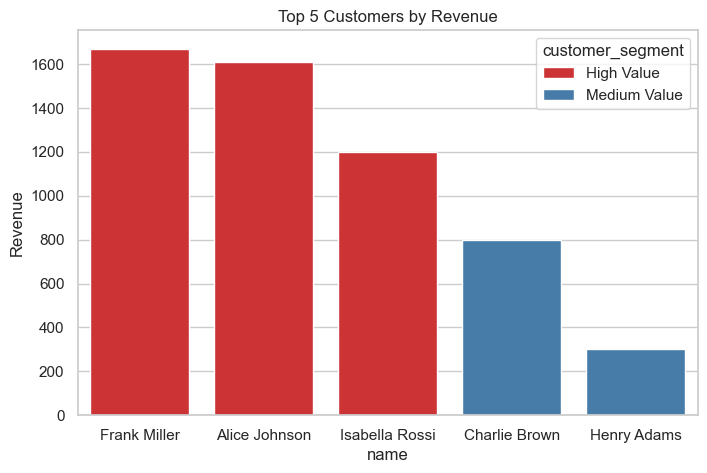

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8,5))
sns.barplot(data=top5, x='name', y='total_revenue', hue='customer_segment', palette='Set1')
plt.title('Top 5 Customers by Revenue')
plt.ylabel('Revenue')
plt.show()

### Where is our customer based concentrated? 

In [14]:
customer_conc= df_customer_revenue['customer_segment'].value_counts()
customer_conc

customer_segment
Low Value       5
High Value      3
Medium Value    2
Name: count, dtype: int64

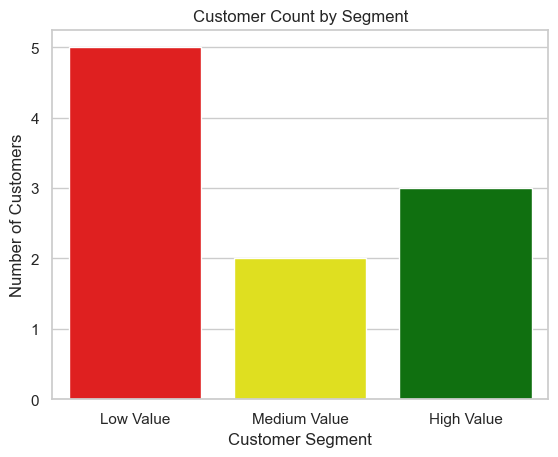

In [15]:
 
colors = {'Low Value':'red','Medium Value':'yellow','High Value':'green'}

# Bar chart: number of customers per segment
sns.countplot(data=df_customer_revenue, x='customer_segment',hue='customer_segment', order=['Low Value','Medium Value','High Value'], palette=colors)
plt.title('Customer Count by Segment')
plt.ylabel('Number of Customers')
plt.xlabel('Customer Segment')
plt.show()

### Which segment actually makes money?

In [16]:
revenue_seg= df_customer_revenue.groupby('customer_segment')['total_revenue'].sum()
revenue_seg

customer_segment
High Value      4480.0
Low Value        365.0
Medium Value    1100.0
Name: total_revenue, dtype: float64

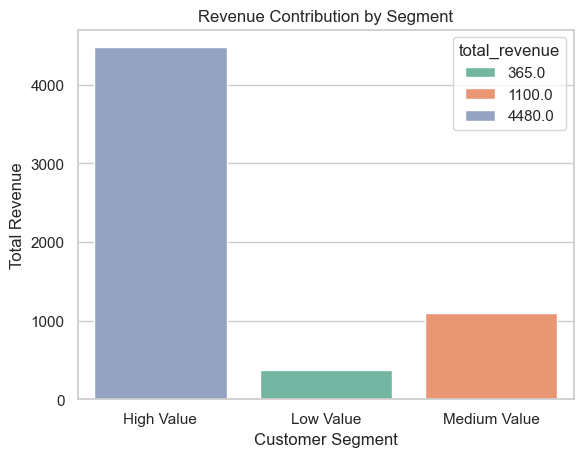

In [17]:
# Revenue contribution
sns.barplot(data=revenue_seg.reset_index(),
            x='customer_segment',hue='total_revenue', y='total_revenue', palette='Set2')
plt.title('Revenue Contribution by Segment')
plt.ylabel('Total Revenue')
plt.xlabel('Customer Segment')
plt.show()

### 2. Monthly Analysis Trend

In [18]:
# Calculated monthly revenue per customer
query= """
WITH monthly_revenue AS (
    SELECT 
        c.customer_id,
        c.name,
        c.city,
        DATE_TRUNC('month', o.created_at) AS month,
        COALESCE(SUM(o.amount), 0) AS revenue_month
    FROM customers c
    JOIN orders o
        ON c.customer_id = o.customer_id
    GROUP BY c.customer_id, c.name, c.city, DATE_TRUNC('month', o.created_at)
)
SELECT * FROM monthly_revenue
ORDER BY revenue_month DESC;
"""

In [19]:
df_monthly_revenue= pd.read_sql(query,conn)
df_monthly_revenue

,customer_id,name,city,month,revenue_month
0,6,Frank Miller,New York,2025-05-01,650.00
1,6,Frank Miller,New York,2025-02-01,540.00
2,9,Isabella Rossi,Paris,2025-03-01,460.00
3,1,Alice Johnson,New York,2025-05-01,400.00
4,8,Henry Adams,Berlin,2025-04-01,310.00
5,3,Charlie Brown,London,2025-01-01,300.00
6,1,Alice Johnson,New York,2025-02-01,250.75
7,5,Ethan Hunt,Berlin,2026-01-01,220.25
8,7,Grace Lee,London,2025-03-01,220.00
9,10,Jack Wilson,New York,2025-04-01,180.00


### Total Revenue per Month

In [20]:
df_monthly= df_monthly_revenue.groupby('month')['revenue_month'].sum().sort_values(ascending=False)
df_monthly

month
2025-05-01    1050.00
2025-03-01     800.50
2025-02-01     790.75
2025-04-01     565.00
2025-01-01     300.00
2026-01-01     220.25
Name: revenue_month, dtype: float64

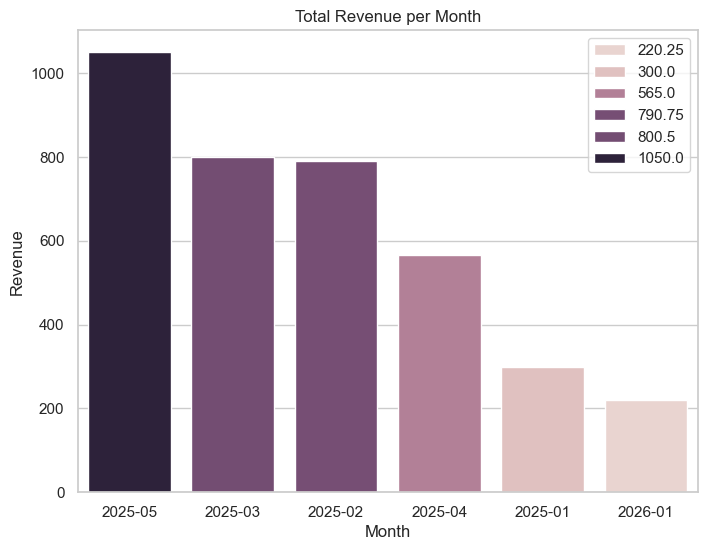

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(x= df_monthly.index.strftime('%Y-%m'), y= df_monthly.values, hue= df_monthly.values)
plt.title('Total Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

### Monthly Revenue per Customer

In [22]:
df_name= df_monthly_revenue.groupby('name')['revenue_month'].sum().sort_values(ascending=False)
df_name

name
Frank Miller      1190.00
Alice Johnson      725.75
Isabella Rossi     460.00
Henry Adams        310.00
Charlie Brown      300.00
Ethan Hunt         220.25
Grace Lee          220.00
Jack Wilson        180.00
Bob Smith          120.50
Name: revenue_month, dtype: float64

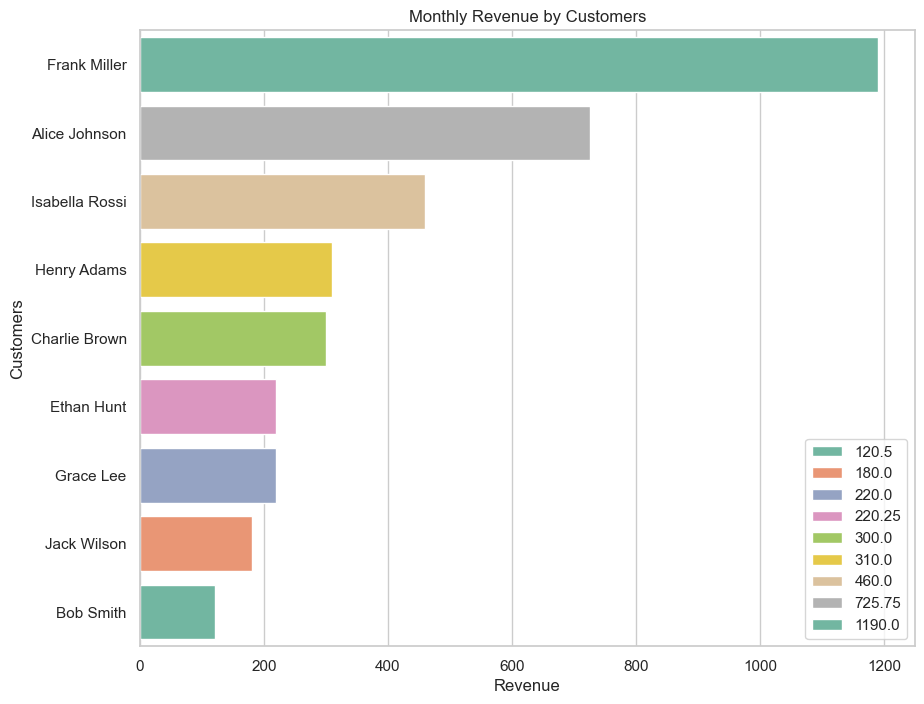

In [23]:
plt.figure(figsize= (10,8))
sns.barplot(y= df_name.index, x = df_name.values, hue= df_name.values , palette='Set2')
plt.title('Monthly Revenue by Customers')
plt.ylabel('Customers')
plt.xlabel('Revenue')
plt.show()

### Monthly Revenue by City

In [24]:
df_city= df_monthly_revenue.groupby('city')['revenue_month'].sum().sort_values(ascending=False)
df_city

city
New York       2095.75
Berlin          530.25
London          520.00
Paris           460.00
Los Angeles     120.50
Name: revenue_month, dtype: float64

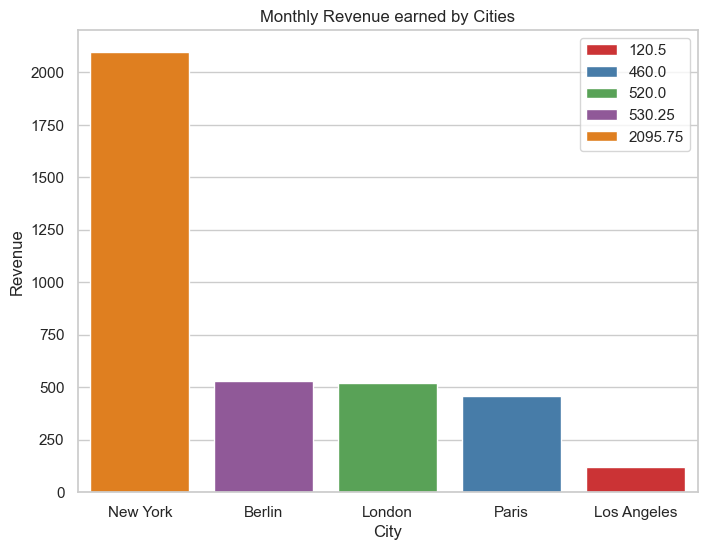

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x= df_city.index, y= df_city.values, hue= df_city.values, palette= 'Set1')
plt.title('Monthly Revenue earned by Cities')
plt.ylabel('Revenue')
plt.xlabel('City')
plt.show()

### 3. Top Revenue Cities

In [26]:
# Calculated and Rank Cities by Revenue
query= """
WITH top_cities AS(
SELECT 
     c.city,
     SUM(oi.quantity * oi.unit_price) AS total_revenue,
     RANK() OVER(ORDER BY SUM(oi.quantity * oi.unit_price)DESC) AS city_rank
FROM customers c
JOIN orders o 
  ON c.customer_id= o.customer_id
JOIN order_items oi
  ON o.order_id= oi.order_id
GROUP BY c.city
)
SELECT* FROM top_cities  
ORDER BY total_revenue DESC; 
"""

In [27]:
df_top_cities= pd.read_sql(query,conn)
df_top_cities

,city,total_revenue,city_rank
0,New York,3355.0,1
1,Paris,1200.0,2
2,London,890.0,3
3,Berlin,440.0,4
4,Los Angeles,60.0,5


### Total Revenue per City

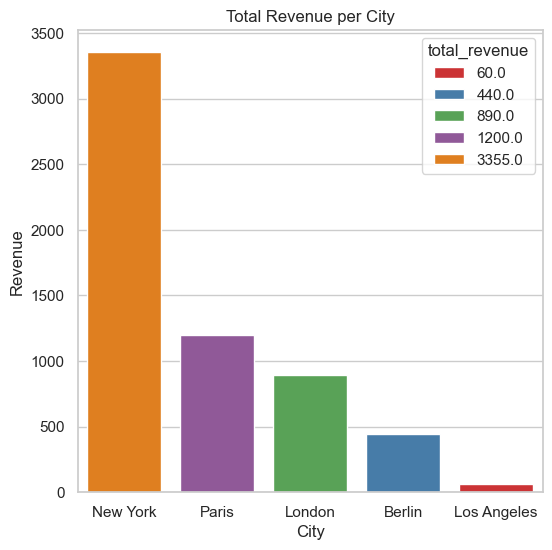

In [28]:
plt.figure(figsize=(6,6))
sns.barplot(data= df_top_cities, x= 'city', y= 'total_revenue', hue= 'total_revenue', palette= 'Set1')
plt.title('Total Revenue per City')
plt.ylabel('Revenue')
plt.xlabel('City')
plt.show()

### Revenue Contribution per City(%)

In [29]:
total_revenue_all_cities= df_top_cities['total_revenue'].sum()
df_top_cities['revenue_percentage']= (df_top_cities['total_revenue'] / total_revenue_all_cities) * 100
df_top_cities['revenue_percentage'] = df_top_cities['revenue_percentage'].round(1)
df_top_cities

,city,total_revenue,city_rank,revenue_percentage
0,New York,3355.0,1,56.4
1,Paris,1200.0,2,20.2
2,London,890.0,3,15.0
3,Berlin,440.0,4,7.4
4,Los Angeles,60.0,5,1.0


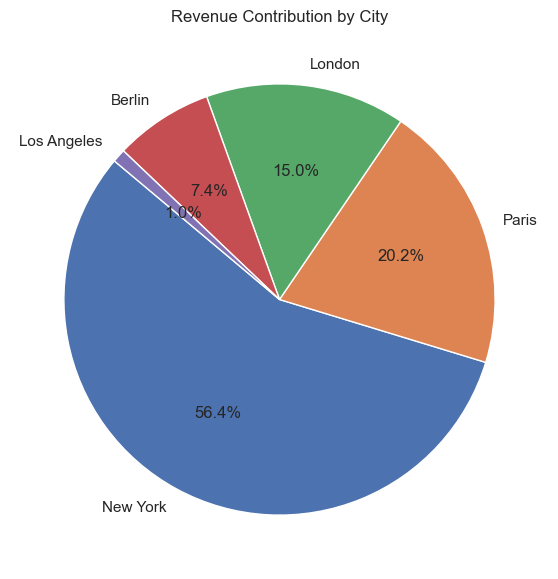

In [30]:
plt.figure(figsize=(7,7))
plt.pie(df_top_cities['revenue_percentage'], labels=df_top_cities['city'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Contribution by City')
plt.show()

### 4. Customer Total Spend Calculation

In [55]:
query= """
WITH customer_spend AS (
    SELECT
        c.customer_id,
        c.name,
        SUM(oi.unit_price * oi.quantity) AS total_revenue
    FROM customers c
    JOIN orders o ON c.customer_id = o.customer_id
    JOIN order_items oi ON o.order_id = oi.order_id
    GROUP BY c.customer_id, c.name
 )
SELECT*,
    NTILE(4) OVER (
        ORDER BY total_revenue DESC
    ) AS spend_quartile
FROM customer_spend
ORDER BY total_revenue DESC;  
"""

In [56]:
df_spend_quartile= pd.read_sql(query,conn)
df_spend_quartile

,customer_id,name,total_revenue,spend_quartile
0,6,Frank Miller,1670.0,1
1,1,Alice Johnson,1610.0,1
2,9,Isabella Rossi,1200.0,1
3,3,Charlie Brown,800.0,2
4,8,Henry Adams,300.0,2
5,5,Ethan Hunt,140.0,3
6,7,Grace Lee,90.0,3
7,10,Jack Wilson,75.0,4
8,2,Bob Smith,60.0,4


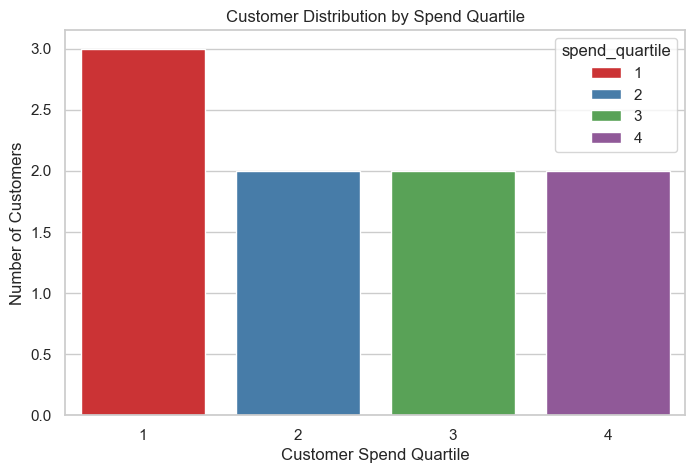

In [60]:
# Count of customers in each quartile
quartile_counts = df_spend_quartile['spend_quartile'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=quartile_counts.index, y=quartile_counts.values,hue= quartile_counts.index , palette="Set1")
plt.xlabel("Customer Spend Quartile")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Spend Quartile")
plt.show()

# BUSINESS INSIGHTS & TAKEAWAYS

### 1. Customer Revenue & Segmentation
**Insight:**
- Top customers generate a large portion of total revenue.
- Business depends heavily on key customers such as **Frank Miller, Alice Johnson and Isabella Rossi** .

**Business Impact:**
- High dependence on a few customers increases revenue risk if they churn or reduce orders.

**Actionable Insight:**
- Focus on retention, loyalty programs, and upselling strategies for high-value customers.

**Takeaway:**
- Engage medium-value customers and protect the high-value customer base.

---

### 2. Revenue Concentration by City
**Insight:**
- A significant portion of total revenue is generated by the **New York** , indicating high geographic concentration.

**Business Impact:**
- Heavy dependence on top-performing city increases risk.
- Any disruption in these regions could significantly affect overall revenue.

**Actionable Insight:**
- Strengthen customer retention and marketing in top cities.
- Diversify revenue streams by investing in underperforming regions.

**Takeaway:**
- Balance focus between top cities and growth in smaller markets.

---

### 3. Monthly Revenue Trends
**Insight:**
- Certain months (e.g., April, May) show revenue spikes, while others are low, indicating seasonality.

**Business Impact:**
- Revenue fluctuations could affect cash flow, inventory planning, and staffing.

**Actionable Insight:**
- Plan marketing campaigns and inventory around high-revenue months.
- Introduce promotions during slow months to smooth revenue.

**Takeaway:**
- Use historical revenue trends to optimize operational and sales planning.

---

### 4. Segment Contribution to Revenue
**Insight:**
- High-value customer segments contribute the majority of revenue.
- Low-value segments contribute very little.

**Business Impact:**
- Revenue growth is limited if low- and medium-value segments are ignored.

**Actionable Insight:**
- Upsell medium-value customers.
- Engage low-value customers through targeted campaigns.

**Takeaway:**
- Focus on growing both existing high-value and medium-value customers for sustainable revenue.

---

### 5. Overall Business Takeaways
- High-value customers and top city dominate revenue, indicating concentrated risk.
- Revenue shows seasonality; some months outperform others consistently, january being at the bottom.
- Strategic marketing, promotions, and loyalty programs should target high-value customers and top-performing regions.
- Monitor medium- and low-value customers for growth opportunities.
- Data-driven planning for inventory, marketing campaigns, and retention can maximize revenue.
